In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd
import shap 
import matplotlib.pyplot as plt

In [10]:
turnover_df= pd.read_csv("turnover.csv")
turnover_df

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,...,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,11,3,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,23,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,15,3,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,11,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,12,3,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,17,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,15,3,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,20,4,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,14,3,80,17,3,2,9,6,0,8


In [11]:
turnover_df.select_dtypes("object").columns

Index(['Turnover', 'ViagensTrabalho', 'Departamento', 'Educacao', 'Genero',
       'Cargo', 'EstadoCivil', 'Acima18Anos', 'HoraExtra'],
      dtype='object')

In [12]:
pd.get_dummies(turnover_df, columns=turnover_df.select_dtypes("object").columns)

,Idade,DistanciaCasa,NivelEducacao,NumeroEmpregado,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,...,Cargo_Research Director,Cargo_Research Scientist,Cargo_Sales Executive,Cargo_Sales Representative,EstadoCivil_Divorced,EstadoCivil_Married,EstadoCivil_Single,Acima18Anos_Y,HoraExtra_No,HoraExtra_Yes
0,41,1,2,1,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,1,0,1
1,49,8,1,2,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,1,0
2,37,2,2,4,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,1,0,1
3,33,3,4,5,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,1,0,1
4,27,2,1,7,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,2061,3,41,4,2,4,2571,...,0,0,0,0,0,1,0,1,1,0
1466,39,6,1,2062,4,42,2,3,1,9991,...,0,0,0,0,0,1,0,1,1,0
1467,27,4,3,2064,2,87,4,2,2,6142,...,0,0,0,0,0,1,0,1,0,1
1468,49,2,3,2065,4,63,2,2,2,5390,...,0,0,1,0,0,1,0,1,1,0


In [33]:
X, y = turnover_df.drop(columns=["Turnover","NumeroEmpregado","Acima18Anos","QtdeHorasTrabalhadasPadrao"]), turnover_df.Turnover.map({"Yes": 1, "No": 0})
X = pd.get_dummies(X, columns=X.select_dtypes("object").columns, drop_first=True)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=42)
xtrain

,Idade,DistanciaCasa,NivelEducacao,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,QtdeEmpresasTrabalhadas,...,Cargo_Laboratory Technician,Cargo_Manager,Cargo_Manufacturing Director,Cargo_Research Director,Cargo_Research Scientist,Cargo_Sales Executive,Cargo_Sales Representative,EstadoCivil_Married,EstadoCivil_Single,HoraExtra_Yes
22,34,7,4,1,53,3,3,2,11994,0,...,0,0,0,1,0,0,0,0,1,0
74,36,6,3,2,55,4,1,4,3038,3,...,1,0,0,0,0,0,0,1,0,0
1339,22,7,1,4,75,3,1,2,2472,1,...,0,0,0,0,1,0,0,0,1,1
251,39,2,4,3,64,3,3,3,10938,0,...,0,0,0,0,0,0,0,0,1,0
1182,36,1,4,4,33,2,2,3,4374,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,46,7,4,3,30,3,2,3,5258,2,...,0,0,1,0,0,0,0,1,0,0
963,38,2,2,2,31,3,2,1,6893,3,...,0,0,0,0,0,1,0,0,0,0
734,22,8,1,2,94,1,1,1,2451,1,...,1,0,0,0,0,0,0,1,0,0
1315,36,2,4,4,73,3,2,2,6962,4,...,0,0,0,0,1,0,0,1,0,1


Treinando o modelo

In [55]:
model=RandomForestClassifier(n_estimators=100, min_samples_split=10)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)

test_auc = roc_auc_score(ytest, y_pred)
test_acc = accuracy_score(ytest, y_pred)
train_auc = roc_auc_score(ytrain, y_train_pred)
train_acc = accuracy_score(ytrain, y_train_pred)

print(f"Train AUC: {train_auc}")
print(f"Train Accuracy: {train_acc}")
print(f"AUC: {test_auc}")
print(f"Accuracy: {test_acc}")

Train AUC: 0.7831667396274138
Train Accuracy: 0.9292196007259528
AUC: 0.5379024738083483
Accuracy: 0.8342391304347826


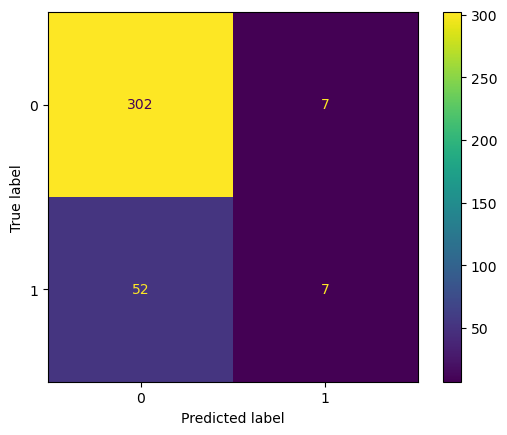

In [53]:
ConfusionMatrixDisplay.from_estimator(
        model,
        xtest,
        ytest,
    )
plt.show()

In [96]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtrain)
shap_obj = explainer(xtrain)


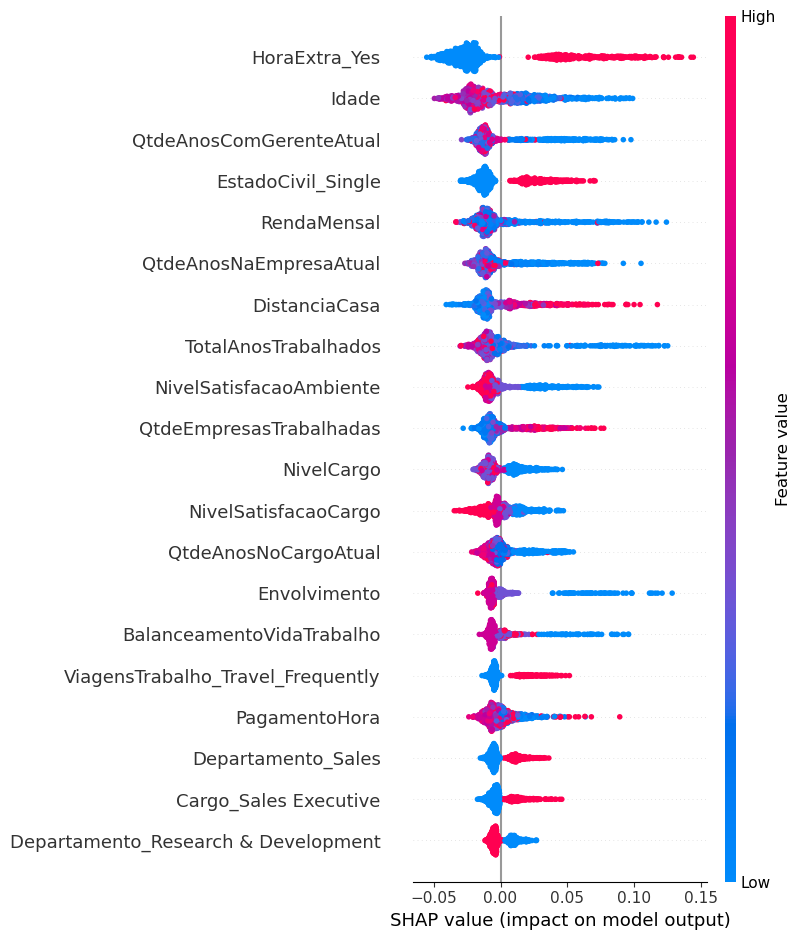

In [95]:
shap.summary_plot(shap_values[1], xtrain)
#shap_values[0]

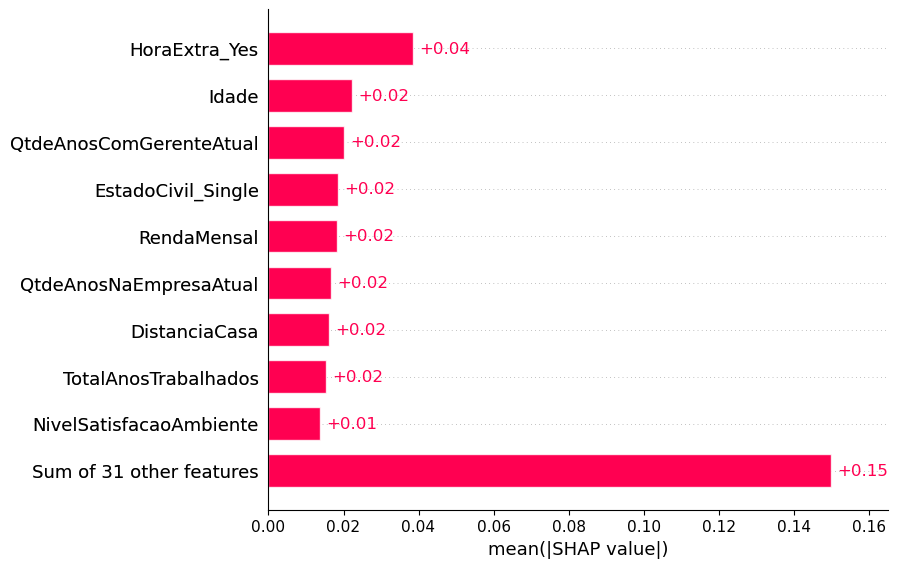

In [122]:
shap.plots.bar(shap_obj[:,:, 1])

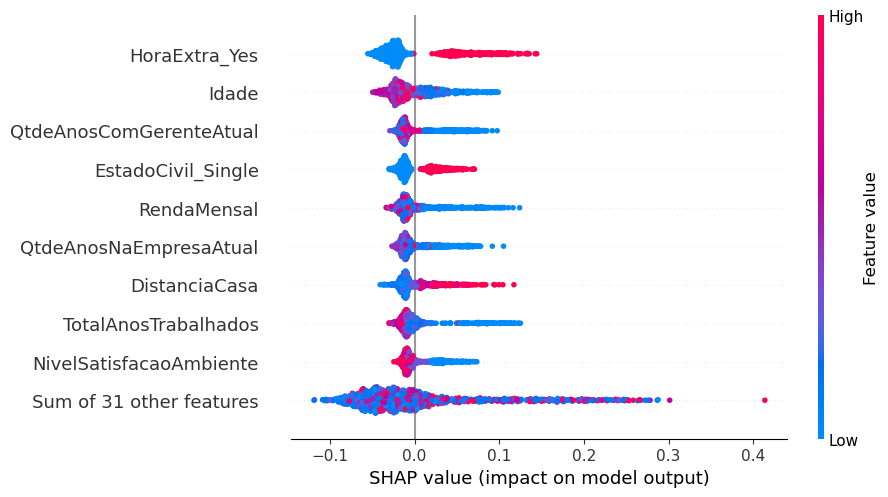

In [117]:
shap.plots.beeswarm(shap_obj[:,:, 1])